#  Introduction¶

In this project we analyze a dataset of credit card transactions made over a two-day period in September 2013 by European cardholders. The dataset contains 284,807 transactions, of which 492 (0.17%) are fraudulent.

Each transaction has 30 features, all of which are numerical. The features V1, V2, ..., V28 are the result of a PCA transformation. To protect confidentiality, background information on these features is not available. The Time feature contains the time elapsed since the first transaction, and the Amount feature contains the transaction amount. The response variable, Class, is 1 in the case of fraud, and 0 otherwise.

Our goal in this project is to construct models to predict whether a credit card transaction is fraudulent. We'll attempt a supervised learning approach. We'll also create visualizations to help us understand the structure of the data and unearth any interesting patterns.

Import basic libraries:

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

 Loading data

In [5]:
df=pd.read_csv('creditcard.csv')

Data Exploration

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Null Values

In [10]:
# df.isnull().sum()
df.isnull().any().any()

False

How balanced are the classes:

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Only 0.17% transactions are fraudulent

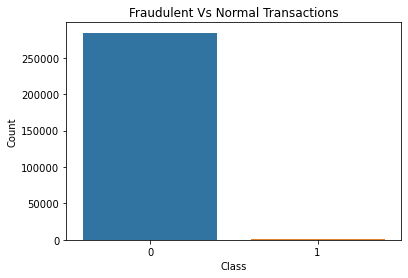

In [25]:
#Lets visualise it
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(),data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraudulent Vs Normal Transactions')
plt.show()

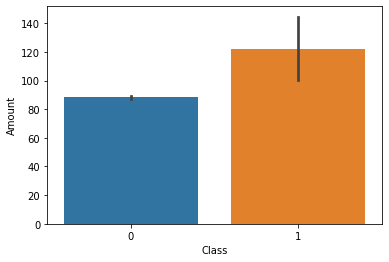

In [28]:
#Fraudulent transactions involve more money
sns.barplot(x=df['Class'],y=df['Amount'],data=df)
plt.show()

### Input and Ouput data

In [14]:
X=df.drop('Class',axis=1)
y=df['Class']

In [15]:
print("Input Shape : ", X.shape)
print("Output Shape : ", y.shape)

Input Shape :  (284807, 30)
Output Shape :  (284807,)


### Splitting testing and training data:

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [21]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape  : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape  : ", y_test.shape)

X_train.shape :  (199364, 30)
X_test.shape  :  (85443, 30)
y_train.shape :  (199364,)
y_test.shape  :  (85443,)


### Pre-processing

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

### Logistic Regression with Original Data

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred=lr.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9991924440855307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.84      0.65      0.73       145

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443

[[85280    18]
 [   51    94]]


### Random Forest with Original Data

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
y_pred=rf.predict(X_test)

In [37]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.91      0.79      0.85       145

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85286    12]
 [   30   115]]


### DEALING WITH IMBALANCED DATASET

UNDER SAMPLING :- Reduce the point of the maximum labels

In [43]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print('The number of classes before fit {}'.format(Counter(y_train)))
print('The number of classes after fit {}'.format(Counter(y_train_ns)))

C:\Users\MANI\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199017, 1: 347})
The number of classes after fit Counter({0: 433, 1: 347})


### MODEL BUILDING

### Logistic Regression

In [44]:
lr=LogisticRegression()
lr.fit(X_train_ns,y_train_ns)

LogisticRegression()

In [45]:
y_pred=lr.predict(X_test)

In [46]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.5986915253443816
              precision    recall  f1-score   support

           0       1.00      0.60      0.75     85298
           1       0.00      0.96      0.01       145

    accuracy                           0.60     85443
   macro avg       0.50      0.78      0.38     85443
weighted avg       1.00      0.60      0.75     85443

[[51015 34283]
 [    6   139]]


### Random Forest

In [47]:
rf=RandomForestClassifier()
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [48]:
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.0619711386538394
              precision    recall  f1-score   support

           0       1.00      0.06      0.11     85298
           1       0.00      0.98      0.00       145

    accuracy                           0.06     85443
   macro avg       0.50      0.52      0.06     85443
weighted avg       1.00      0.06      0.11     85443

[[ 5153 80145]
 [    3   142]]


OVER SAMPLING :-Inlarge the points of minimum labels

In [50]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.5)
X_train_os,y_train_os=os.fit_sample(X_train,y_train)
print('the number of classes before fit {}'.format(Counter(y_train)))
print('the number of classes after fit {}'.format(Counter(y_train_os)))

C:\Users\MANI\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


the number of classes before fit Counter({0: 199017, 1: 347})
the number of classes after fit Counter({0: 199017, 1: 99508})


### Logistic Regression

In [53]:
lr=LogisticRegression()
lr.fit(X_train_os,y_train_os)

LogisticRegression()

In [54]:
y_pred=lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.9906136254579077
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85298
           1       0.14      0.90      0.24       145

    accuracy                           0.99     85443
   macro avg       0.57      0.94      0.62     85443
weighted avg       1.00      0.99      0.99     85443

[[84511   787]
 [   15   130]]


### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [52]:
y_pred=rf.predict(X_test)
print("Accuracy:"accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9995084442259752
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.91      0.79      0.85       145

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85286    12]
 [   30   115]]
